In [1]:
import torch
from diffusion import scheduling

/Users/kisonho/Developer/diffusion.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
T = 1000
constant_beta_space = scheduling.constant_schedule(T)
cosine_beta_space = scheduling.cosine_schedule(T)
linear_beta_space = scheduling.linear_schedule(T, beta_start=0.001, beta_end=0.029)
peak_linear_space = scheduling.peak_linear_schedule(T)
step_space = scheduling.step_schedule(T)

In [3]:
linear_beta_space.betas.sum()

tensor(15.)

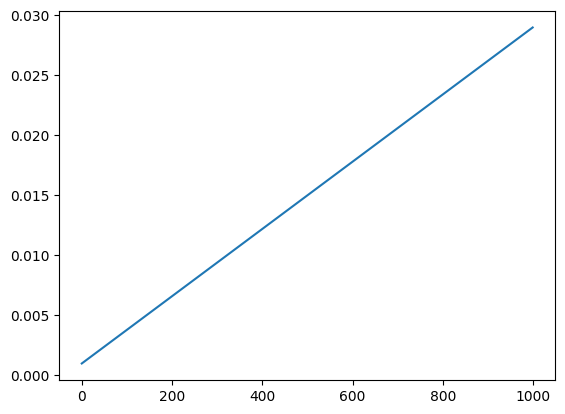

In [4]:
import matplotlib.pyplot as plt

plt.plot(linear_beta_space.betas, label='Constant')
plt.show()


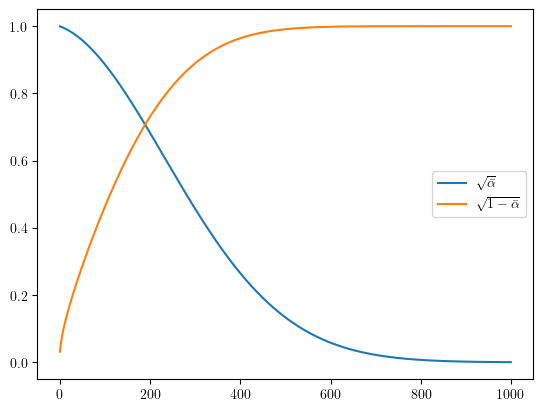

In [5]:
plt.rcParams['text.usetex'] = True  # enable LaTeX rendering
plt.plot(linear_beta_space.sqrt_alphas_cumprod, label=r"$\sqrt{\bar{\alpha}}$")
plt.plot(linear_beta_space.sqrt_one_minus_alphas_cumprod, label=r"$\sqrt{1-\bar{\alpha}}$")
plt.legend()
plt.show()

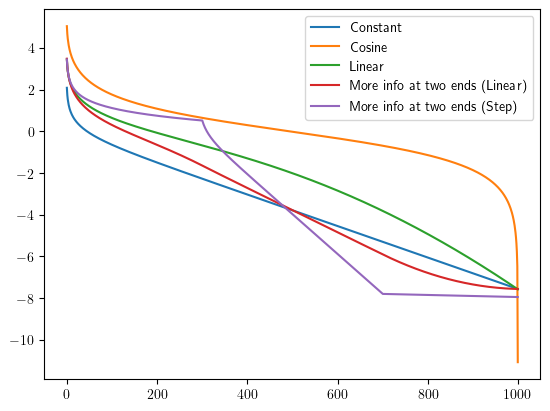

In [6]:
snr_constant = constant_beta_space.sqrt_alphas_cumprod / constant_beta_space.sqrt_one_minus_alphas_cumprod
snr_constant = snr_constant.log()

snr_cosine = cosine_beta_space.sqrt_alphas_cumprod / cosine_beta_space.sqrt_one_minus_alphas_cumprod
snr_cosine = snr_cosine.log()

snr_linear = linear_beta_space.sqrt_alphas_cumprod / linear_beta_space.sqrt_one_minus_alphas_cumprod
snr_linear = snr_linear.log()

snr_peak_linear = peak_linear_space.sqrt_alphas_cumprod / peak_linear_space.sqrt_one_minus_alphas_cumprod
snr_peak_linear = snr_peak_linear.log()

snr_step = step_space.sqrt_alphas_cumprod / step_space.sqrt_one_minus_alphas_cumprod
snr_step = snr_step.log()

plt.plot(snr_constant, label="Constant")
plt.plot(snr_cosine, label="Cosine")
plt.plot(snr_linear, label="Linear")
plt.plot(snr_peak_linear, label="More info at two ends (Linear)")
plt.plot(snr_step, label="More info at two ends (Step)")
plt.legend()
plt.show()

In [7]:
def reverse_sigmoid_schedle(time_steps: int, /, beta_start: float = 1e-4, beta_end: float = 0.02) -> scheduling.BetaSpace:
    sigmoid_betas = scheduling.sigmoid_schedule(time_steps, beta_start=beta_start, beta_end=beta_end)
    linear_betas = scheduling.linear_schedule(time_steps, beta_start=float(sigmoid_betas.betas[0]), beta_end=float(sigmoid_betas.betas[-1]))
    return scheduling.BetaSpace(linear_betas.betas * 2 - sigmoid_betas.betas)

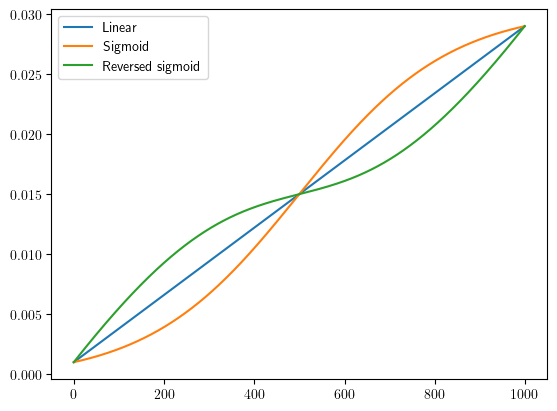

In [8]:
linear_beta_space = scheduling.linear_schedule(T, beta_start=0.001, beta_end=0.029)
sigmoid_beta_space = scheduling.sigmoid_schedule(T, beta_start=0.001, beta_end=0.029)
reverse_sigmoid_beta_space = reverse_sigmoid_schedle(T, beta_start=0.001, beta_end=0.029)

plt.plot(linear_beta_space.betas, label="Linear")
plt.plot(sigmoid_beta_space.betas, label="Sigmoid")
plt.plot(reverse_sigmoid_beta_space.betas, label="Reversed sigmoid")
plt.legend()
plt.show()